In [49]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [50]:
df1 = pd.read_csv('primary-with-valuation.csv')

df1.head()

,name,tagline,summary,description,year_founded,website,city,region,country,postal_code,concepts,keywords,investor_count,mosaic_change,funding_total_millions,last_funding_millions,funding_count,last_funding_type,last_funding_date,valuation_millions,valuation_date,sentiment,articles
0,PlainID,"Secure Your Identity, Empower Your Business",PlainID is a company based in Tel Aviv that sp...,PlainID is an Identity Security Posture Manage...,2014.0,https://plainid.com,Tel Aviv,NaN,Israel,6789139,['PlainID offers the Identity Security Posture...,"['Cybersecurity', 'Identity Management', 'Data...",10,-120.0,99.00,75.00,5,Series C,2021-12-21,48.0,2020-12,"{'sentimentScore': 100, 'cntPositive': 21, 'cn...",[{'contentId': '29c3c127-069d-4be7-aaf6-3a89bb...
1,slice,"Experience Money, Mastered.",slice is a financial technology company based ...,Slice operates as a financial technology compa...,2016.0,https://sliceit.com,NaN,Assam,India,781028,"['Trusted by over 17 million Indians', 'Offers...","['FinTech', 'ConsumerTech', 'E-Commerce', 'Dig...",36,-76.0,390.50,7.77,21,Debt - VIII,2024-07-19,1800.0,2022-06,"{'sentimentScore': 89, 'cntPositive': 36, 'cnt...",[{'contentId': 'ce75fa10-6d0f-45d5-bf66-2532b8...
2,slice,"Experience Money, Mastered.",slice is a financial technology company based ...,Slice operates as a financial technology compa...,2016.0,https://sliceit.com,NaN,Assam,India,781028,"['Trusted by over 17 million Indians', 'Offers...","['FinTech', 'ConsumerTech', 'E-Commerce', 'Dig...",36,-76.0,390.50,7.77,21,Debt - VIII,2024-07-19,1800.0,2022-06,"{'sentimentScore': 89, 'cntPositive': 36, 'cnt...",[{'contentId': 'ce75fa10-6d0f-45d5-bf66-2532b8...
3,DispatchHealth,"Healing at Home, Comfort in Care",DispatchHealth is a Colorado-based company tha...,DispatchHealth is a healthcare company that fo...,2013.0,https://dispatchhealth.com,Denver,Colorado,United States,80907,"[""DispatchHealth offers on-demand urgent healt...","['Healthcare', 'Telemedicine', 'Home Health Ca...",15,-47.0,740.96,259.00,8,Series E,2022-11-15,1700.0,2021-03,"{'sentimentScore': 99, 'cntPositive': 85, 'cnt...",[{'contentId': '556f0d4d-3523-47e0-8f48-8f8ad9...
4,Survios,"Step Into Adventure, Unleash Your Imagination",Survios is a California-based company that spe...,Survios is a leading VR games studio known for...,2013.0,https://survios.com,Marina del Rey,California,United States,90292,['Specializes in creating immersive VR experie...,"['Augmented Reality', 'Gaming', 'Virtual Reali...",14,28.0,70.95,16.70,5,Series D,2020-10-02,30.0,2015-10,"{'sentimentScore': 68, 'cntPositive': 24, 'cnt...",[{'contentId': '7fb0f8fb-b77e-4b7c-b89c-725fad...


In [51]:
df1.drop(['name', 'tagline', 'summary', 'description', 'website', 'region', 'country', 'postal_code', 'concepts',
         'keywords', 'last_funding_type', 'last_funding_date', 'articles'], axis=1, inplace=True)

In [52]:
df1.dtypes

year_founded              float64
city                       object
investor_count              int64
mosaic_change             float64
funding_total_millions    float64
last_funding_millions     float64
funding_count               int64
valuation_millions        float64
valuation_date             object
sentiment                  object
dtype: object

In [53]:
city_target_mean = df1.groupby('city')['valuation_millions'].mean()
df1['city_target'] = df1['city'].map(city_target_mean)

valuation_date_target_mean = df1.groupby('valuation_date')['valuation_millions'].mean()
df1['valuation_date_target'] = df1['valuation_date'].map(valuation_date_target_mean)

sentiment_target_mean = df1.groupby('sentiment')['valuation_millions'].mean()
df1['sentiment_target'] = df1['sentiment'].map(sentiment_target_mean)

df1['city_target'].fillna(0, inplace=True)

In [56]:
X1 = df1.drop(['city', 'valuation_date', 'sentiment', 'valuation_millions'], axis=1)
y1 = df1['valuation_millions']

In [19]:
scaler = StandardScaler()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [20]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X1_train_scaled, y1_train)

print("Best Parameters:", grid_search.best_params_)
best_svr = grid_search.best_estimator_

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}


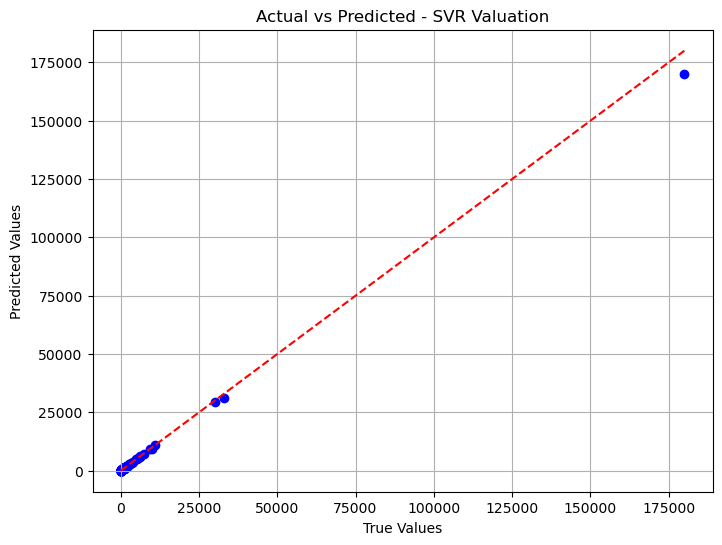

In [27]:
svr1_model = SVR(kernel='linear', C=100.0, epsilon=1.0)
svr1_model.fit(X1_train_scaled, y1_train)
y_pred_svr1 = svr1_model.predict(X1_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y_pred_svr1, color='blue')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - SVR Valuation')
plt.grid()
plt.show()

In [22]:
mae_svr1 = mean_absolute_error(y1_test, y_pred_svr1)
print("Mean Absolute Error (MAE):", mae_svr1)

mse_svr1 = mean_squared_error(y1_test, y_pred_svr1)
print("Mean Squared Error (MSE):", mse_svr1)

rmse_svr1 = np.sqrt(mse_svr1)
print("Root Mean Squared Error (RMSE):", rmse_svr1)

r2_svr1= r2_score(y1_test, y_pred_svr1)
print("R-squared (R^2):", r2_svr1)

Mean Absolute Error (MAE): 111.03196638107684
Mean Squared Error (MSE): 637862.359483656
Root Mean Squared Error (RMSE): 798.6628572080061
R-squared (R^2): 0.9969844521450806


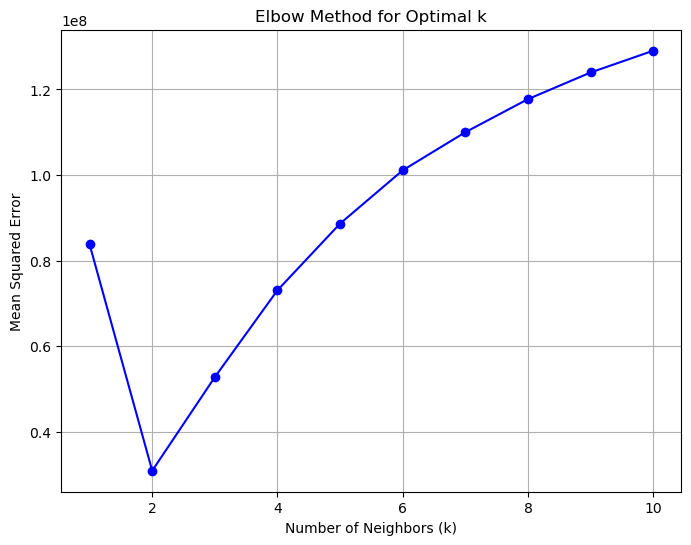

In [23]:
errors = []
k_values = range(1, 11)  

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X1_train, y1_train)
    y_pred = knn.predict(X1_test)
    
    mse = mean_squared_error(y1_test, y_pred)
    errors.append(mse)

plt.figure(figsize=(8, 6))
plt.plot(k_values, errors, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.show()

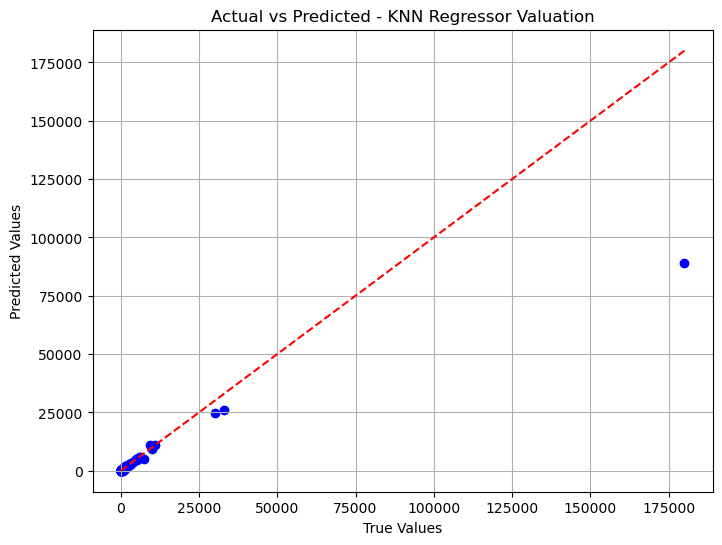

In [26]:
k = 3
knn1_regressor = KNeighborsRegressor(n_neighbors=k, weights='distance')
knn1_regressor.fit(X1_train, y1_train)
y1_pred_knn = knn1_regressor.predict(X1_test)

plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_knn, color='blue')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - KNN Regressor Valuation')
plt.grid()
plt.show()

In [25]:
mae_knn1 = mean_absolute_error(y1_test, y1_pred_knn)
print("Mean Absolute Error (MAE):", mae_knn1)

mse_knn1 = mean_squared_error(y1_test, y1_pred_knn)
print("Mean Squared Error (MSE):", mse_knn1)

rmse_knn1 = np.sqrt(mse_knn1)
print("Root Mean Squared Error (RMSE):", rmse_knn1)

r2_knn1= r2_score(y1_test, y1_pred_knn)
print("R-squared (R^2):", r2_knn1)

Mean Absolute Error (MAE): 751.0012829743388
Mean Squared Error (MSE): 51766817.745064884
Root Mean Squared Error (RMSE): 7194.9161041019015
R-squared (R^2): 0.7552680231304131
